# **Probablitiy Project- US Health Insurance Dataset**

Dataset : insurance.csv

This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset. 

In [1]:
# load data
import pandas as pd
import numpy as np
import itertools
import random
from collections import Counter

# visualization
from scipy.stats import f
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


---
## Descriptive Statistical Analysis

Branch of statistics that focuses on summarizing and organizing the features of a dataset to describe its main features.

#### 1. Basic statistical details

In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 2. Variance for smokers and non-smokers

    Variance for smokers and non-smoker across all attributes.

In [5]:
var_smoker = insurance[insurance['smoker'] == 'yes'].var()
var_non_smoker = insurance[insurance['smoker'] == 'no'].var()

var_smoker_1 = var_smoker.apply("{:.2f}".format)
var_non_smoker_1 = var_non_smoker.apply("{:.2f}".format)

print("Variance for smokers:")
print(var_smoker_1)
print()
print("Variance for non-smokers:")
print(var_non_smoker_1)

Variance for smokers:
age               193.86
bmi                39.93
children            1.34
charges     133207311.21
dtype: object

Variance for non-smokers:
age              198.34
bmi               36.52
children           1.48
charges     35925420.50
dtype: object


    Comparing the variance of insurance charges for smokers and non-smokers.

In [6]:
var_smoker = round(insurance[insurance['smoker'] == 'yes']['charges'].var(), 2)
var_non_smoker = round(insurance[insurance['smoker'] == 'no']['charges'].var(), 2)

# Comparison of variance with a precision of 2 decimal places
are_variances_equal = var_smoker == var_non_smoker

# Print
if are_variances_equal:
    print("Charges variance for smokers and non-smokers is equal.")
else:
    print("There's a difference in insurance charges variance between smokers and non-smokers.")

There's a difference in insurance charges variance between smokers and non-smokers.


#### 3. Comparing the average age of female and male smokers

In [7]:
# Filter data for females who smoke and calculate the average age.
avg_age_female_smokers = round(insurance[(insurance['sex'] == 'female') & (insurance['smoker'] == 'yes')]['age'].mean(), 2)


# Filter data for males who smoke and calculate the average age.
avg_age_male_smokers = round(insurance[(insurance['sex'] == 'male') & (insurance['smoker'] == 'yes')]['age'].mean(), 2)


# Comparison of average age
are_averages_equal = avg_age_female_smokers == avg_age_male_smokers

print(f"Average age of female smokers: {avg_age_female_smokers}")
print(f"Average age of male smokers: {avg_age_male_smokers}")
print()


# Cetak hasil
if are_averages_equal:
    print("Female and male smokers have the same average age.")
else:
    print("There's a difference in average age between female and male smokers.")


Average age of female smokers: 38.61
Average age of male smokers: 38.45

There's a difference in average age between female and male smokers.


#### 4. Which has a higher average insurance charges: smokers with a BMI over 25 or non-smokers with a BMI over 25 (considered overweight)?

In [8]:
# Filter data for smokers with a BMI > 25 and calculate their average charges
avg_charges_smokers_overweight = insurance[(insurance['smoker'] == 'yes') & (insurance['bmi'] > 25)]['charges'].mean()

# Filter data for non-smokers with a BMI < 25 and calculate their average charges
avg_charges_non_smokers_overweight = insurance[(insurance['smoker'] == 'no') & (insurance['bmi'] > 25)]['charges'].mean()

print("Average insurance charges for smokers with a BMI > 25 : ", avg_charges_smokers_overweight)
print("Average insurance charges for non-smokers with a BMI > 25 : ", avg_charges_non_smokers_overweight)
print()


if avg_charges_smokers_overweight > avg_charges_non_smokers_overweight:
    print("The average insurance charges for smokers with a BMI > 25 is higher.")
else:
    print("The average insurance charges for non-smokers with a BMI > 25 is higher.")

Average insurance charges for smokers with a BMI > 25 :  35116.90965694064
Average insurance charges for non-smokers with a BMI > 25 :  8629.589609712157

The average insurance charges for smokers with a BMI > 25 is higher.


#### 5. Evaluating the BMI differences of a smoker versus a non-smoker.

In [9]:
mean_bmi_smoker = round(insurance[insurance['smoker'] == 'yes']['bmi'].mean(), 2)
mean_non_bmi_smoker = round(insurance[insurance['smoker'] == 'no']['bmi'].mean(), 2)
    

print("Variance for smoker:", mean_bmi_smoker)
print("Variance for non-smoker:", mean_non_bmi_smoker)
print()


if mean_bmi_smoker > mean_non_bmi_smoker:
    print("The average BMI of smokers is higher.")
else:
    print("The average BMI of non-smokers is higher.")

Variance for smoker: 30.71
Variance for non-smoker: 30.65

The average BMI of smokers is higher.


---
## Discrete Variable Analysis

In statistics, a discrete variable is a variable that can take on a finite number of values or a countable number of values. Analyzing discrete variables often involves methods suitable for count data, and the data is often summarized using frequency tables, histograms, or bar charts.

#### 1. The highest insurance charges based on gender.

In [10]:
charge_female = round(insurance[insurance['sex'] == 'female']['charges'].max(), 2)
charge_male = round(insurance[insurance['sex'] == 'male']['charges'].max(), 2)

print("Highest insurance charges for female:", charge_female)
print("Highest insurance charges for male:", charge_male)
print()

# Cetak hasil
if charge_female > charge_male:
    print("The female has the highest insurance charges.")
else:
    print("The male has the highest insurance charges.")

Highest insurance charges for female: 63770.43
Highest insurance charges for male: 62592.87

The female has the highest insurance charges.


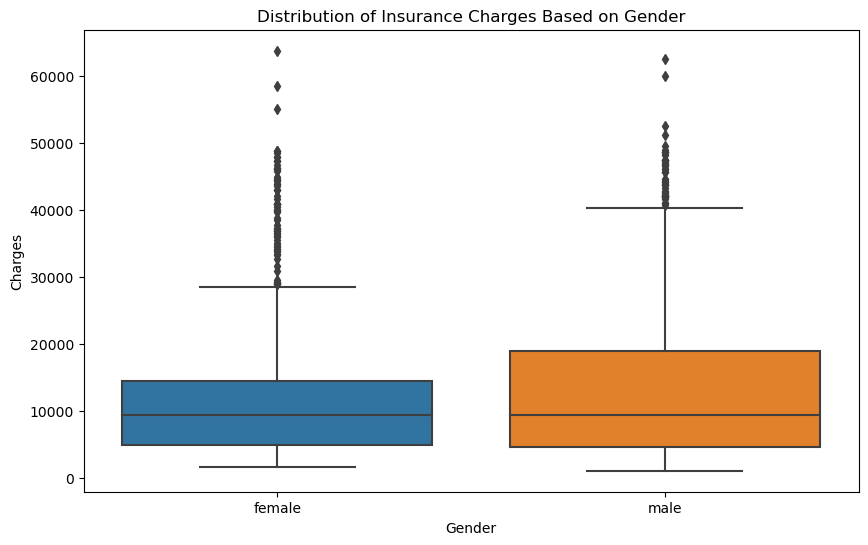

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="charges", data=insurance)
plt.title("Distribution of Insurance Charges Based on Gender")
plt.ylabel("Charges")
plt.xlabel("Gender")
plt.show()

#### 2. Distribution of insurance charges probability in each region.

In [12]:
# Calculate the probability distribution of insurance charges in each region.
probability_distribution = insurance['region'].value_counts(normalize=True)


print("Distribution of insurance charges probability in each region:")
print(probability_distribution )

Distribution of insurance charges probability in each region:
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


#### 3. Proportion of people in each region

In [13]:
# Calculate the number of data in each region
region_counts = insurance['region'].value_counts()

print(region_counts)

# Check if each region has the same proportion.
is_uniform_distribution = len(region_counts.unique()) == 1

print()

if is_uniform_distribution:
    print("Each region has data proportions with the same number of people.")
else:
    print("Each region doesn't have data proportions with the same number of people.")

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Each region doesn't have data proportions with the same number of people.


#### 4. The probability female given that she is a smoker

In [14]:
# Calculate the total number of smokers
total_smokers = len(insurance[insurance['smoker'] == 'yes'])

# Calculate the number of female smokers.
female_smokers = len(insurance[(insurance['smoker'] == 'yes') & (insurance['sex'] == 'female')])

# Calculate the probability that someone is a woman given that she is a smoker.
probability_female_given_smoker = female_smokers / total_smokers

print(f"The probability female given that she is a smoker: {probability_female_given_smoker:.2f}")

The probability female given that she is a smoker: 0.42


#### 5. The probability distribution of insurance charges from each region

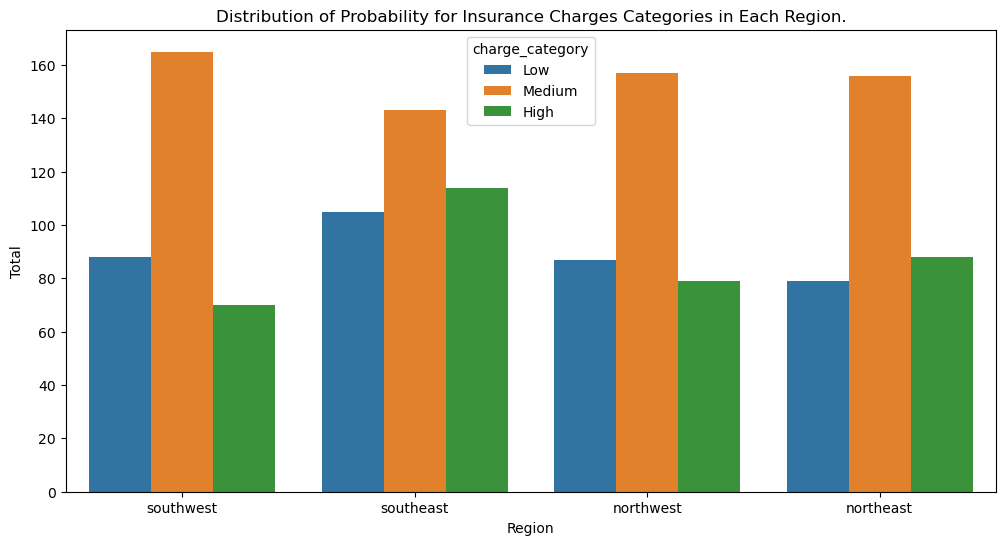

In [15]:
# Categorize 'charges'
bins = [0, 5000, 15000, 50000]
labels = ["Low", "Medium", "High"]
insurance['charge_category'] = pd.cut(insurance['charges'], bins=bins, labels=labels)

# Set image size
plt.figure(figsize=(12, 6))

# Create countplot
sns.countplot(data=insurance, x='region', hue='charge_category')

# Set title and label
plt.title('Distribution of Probability for Insurance Charges Categories in Each Region.')
plt.ylabel('Total')
plt.xlabel('Region')

# Show plot
plt.show()

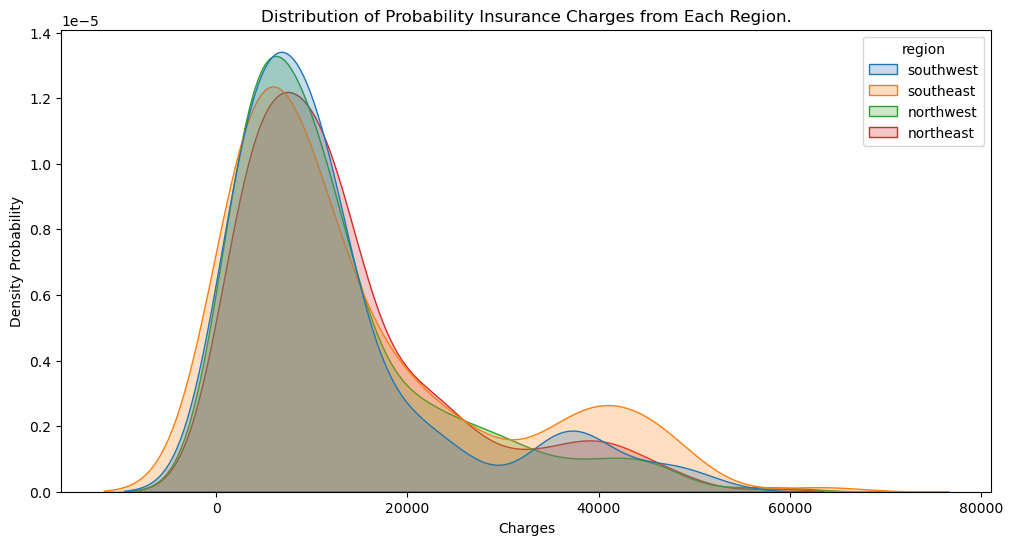

In [16]:

plt.figure(figsize=(12, 6))

# KDE plot
sns.kdeplot(data=insurance, x='charges', hue='region', fill=True)


plt.title('Distribution of Probability Insurance Charges from Each Region.')
plt.ylabel('Density Probability')
plt.xlabel('Charges')

# Tampilkan plot
plt.show()

---
## Continuous Variable Analysis

Continuous Variable Analysis involves examining variables that can take on an infinite number of values within a given range. Unlike discrete variables, which have distinct, separate values, continuous variables can assume any value within a continuum. Typical analytical methods for continuous variables include determining mean, median, and standard deviation, and visualizing data using histograms or line graphs.

1. Which is more likely to happen:

    - Someone with a BMI above 25 receives insurance charges above 16700

    - Someone with a BMI below 25 receives insurance charges above 16700

In [17]:
total_bmi_above_25 = insurance[insurance['bmi'] > 25].shape[0]
charges_above_16700_with_bmi_above_25 = insurance[(insurance['bmi'] > 25) & (insurance['charges'] > 16700)].shape[0]

prob_bmi_above_25_and_charges_above_16700 = charges_above_16700_with_bmi_above_25 / total_bmi_above_25


total_bmi_below_25 = insurance[insurance['bmi'] < 25].shape[0]
charges_above_16700_with_bmi_below_25 = insurance[(insurance['bmi'] < 25) & (insurance['charges'] > 16700)].shape[0]

prob_bmi_below_25_and_charges_above_16700 = charges_above_16700_with_bmi_below_25 / total_bmi_below_25


if prob_bmi_above_25_and_charges_above_16700 > prob_bmi_below_25_and_charges_above_16700:
    print("Chances are higher for someone with a BMI over 25 to incur a insurance charges surpassing 16700.")
else:
    print("Chances are higher for someone with a BMI under 25 to incur a insurance charges surpassing 16700.")

Chances are higher for someone with a BMI over 25 to incur a insurance charges surpassing 16700.


2. Which is more likely to happen:

    - A smoker with a BMI above 25 receives insurance charges above 16700
    - A non-smoker with a BMI above 25 receives insurance charges above 16700

In [18]:
total_smoker_bmi_above_25 = insurance[(insurance['smoker'] == 'yes') & (insurance['bmi'] > 25)].shape[0]
charges_above_16700_smoker_bmi_above_25 = insurance[(insurance['smoker'] == 'yes') & (insurance['bmi'] > 25) & (insurance['charges'] > 16700)].shape[0]

prob_smoker_bmi_above_25_and_charges_above_16700 = charges_above_16700_smoker_bmi_above_25 / total_smoker_bmi_above_25


total_non_smoker_bmi_above_25 = insurance[(insurance['smoker'] == 'no') & (insurance['bmi'] > 25)].shape[0]
charges_above_16700_non_smoker_bmi_above_25 = insurance[(insurance['smoker'] == 'no') & (insurance['bmi'] > 25) & (insurance['charges'] > 16700)].shape[0]

prob_non_smoker_bmi_above_25_and_charges_above_16700 = charges_above_16700_non_smoker_bmi_above_25 / total_non_smoker_bmi_above_25

if prob_smoker_bmi_above_25_and_charges_above_16700 > prob_non_smoker_bmi_above_25_and_charges_above_16700:
    print("Chances are higher that a smoker with a BMI over 25 will have insurance charges exceeding 16700")
else:
    print("Chances are higher that a non-smoker with a BMI over 25 will have insurance charges exceeding 16700")



Chances are higher that a smoker with a BMI over 25 will have insurance charges exceeding 16700


---
## Variable Correlation Analysis

Variable Correlation Analysis studies the relationship or association between two variables to determine if a change in one variable might predict a change in another. It's often represented by a correlation coefficient, which can range from -1 to 1. A positive value indicates a positive linear relationship, a negative value indicates an inverse linear relationship, and a value close to 0 indicates little to no linear relationship. 

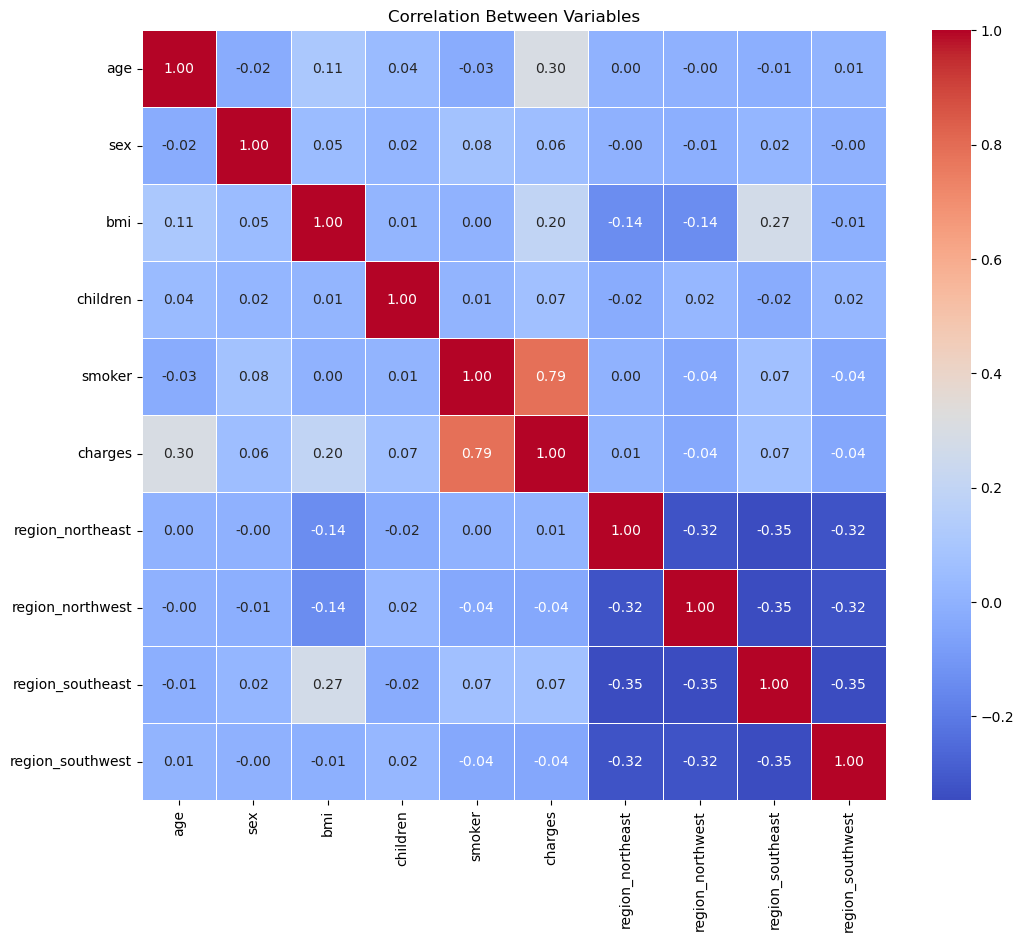

In [19]:
# Converts 'smoker' and 'sex' to numeric
insurance['smoker'] = insurance['smoker'].map({'yes': 1, 'no': 0})
insurance['sex'] = insurance['sex'].map({'male': 1, 'female': 0})

# Uses one-hot encoding for 'regions'
region_dummies = pd.get_dummies(insurance['region'], prefix='region')
insurance = pd.concat([insurance, region_dummies], axis=1)
insurance.drop('region', axis=1, inplace=True)


correlation_matrix = insurance.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

In [20]:
df = pd.read_csv('insurance.csv')

# Converting categorical data into numeric using label encoding.
df['sex'] = df['sex'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes

# For 'region', we will use one-hot encoding because there are more than two categories.
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Calculate covariance
cov_matrix = df.cov()
print("Covariance Matrix:")
print(cov_matrix)

print("\n")

Covariance Matrix:
                           age         sex           bmi    children  \
age                 197.401387   -0.146559      9.362337    0.719303   
sex                  -0.146559    0.250160      0.141435    0.010348   
bmi                   9.362337    0.141435     37.187884    0.093795   
children              0.719303    0.010348      0.093795    1.453213   
smoker               -0.141903    0.015383      0.009233    0.003734   
charges           50874.802298  347.014469  14647.304426  992.674197   
region_northwest     -0.002456   -0.002394     -0.355777    0.012829   
region_southeast     -0.072818    0.003811      0.733062   -0.012379   
region_southwest      0.060372   -0.000898     -0.016233    0.011333   

                       smoker       charges  region_northwest  \
age                 -0.141903  5.087480e+04         -0.002456   
sex                  0.015383  3.470145e+02         -0.002394   
bmi                  0.009233  1.464730e+04         -0.355777   


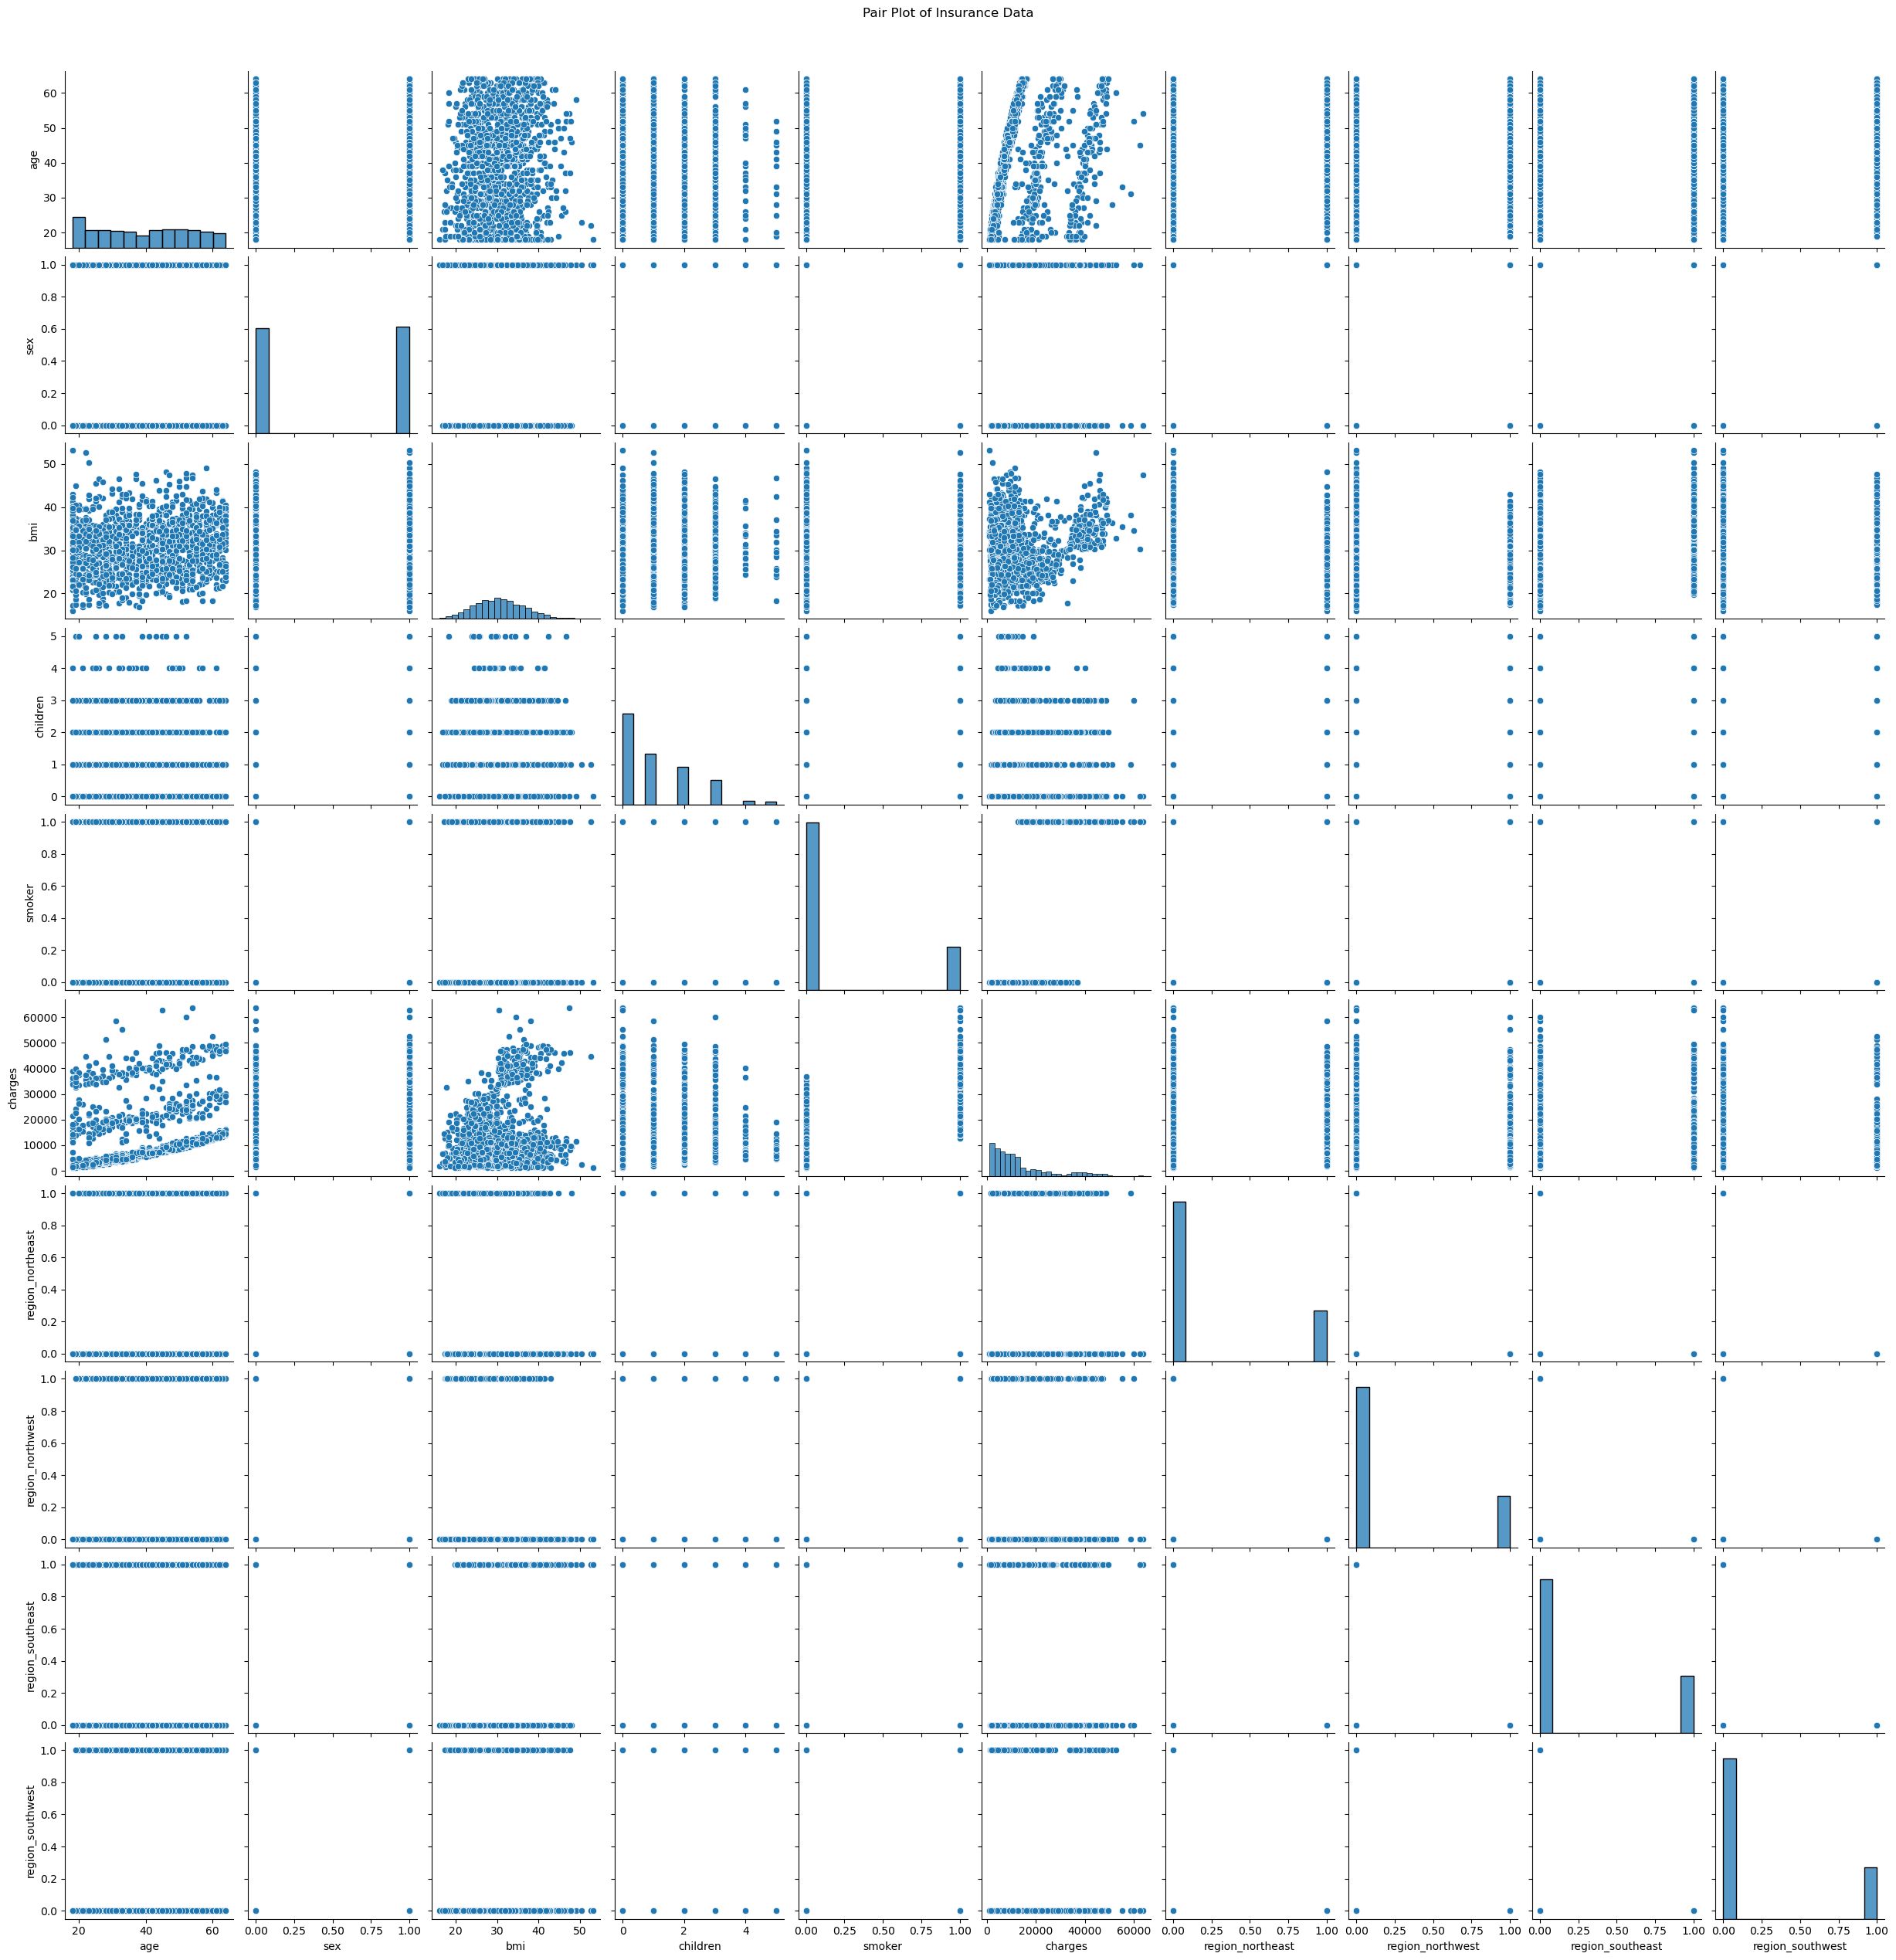

In [21]:
sns.pairplot(insurance)
plt.suptitle('Pair Plot of Insurance Data', y=1.02)  # Adding a title to the plot
plt.show()

---
## Hypothesis Testing

In [22]:
insurance = pd.read_csv("insurance.csv")

#### 1. Do the insurance charges for smokers and non-smokers have equal variances?

Assume:
    
$$ x = smokers $$
$$ y = non-smokers $$

Hypothesis:

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$


To solve the problem, we can use a hypothesis test for two variances. Utilizing the f-distribution is an option to address this particular issue :

$$ F = \frac{s_x^2}{s_y^2} $$

Where we've discovered that $s_x^2$ is the highest sample variance and dan $s_y^2$ is the lowest sample variance. The F-test is a statistical test that can help determine if two sample variances are equal, using the F-distribution. The F distribution arises when you divide one variance by another. If two populations both have the same variance, and you take a sample from each and compute the sample variances, then the ratio of those sample variances will follow an F-distribution. 

    - Method 1: Using p-value

In [23]:
smoker_charges = insurance[insurance['smoker'] == 'yes']['charges']
non_smoker_charges = insurance[insurance['smoker'] == 'no']['charges']

# Calculate F-test statistics
F = smoker_charges.var() / non_smoker_charges.var()

# Find p-value
df1 = len(smoker_charges) - 1  # first group degrees of freedom
df2 = len(non_smoker_charges) - 1  # second group degrees of freedom

# Use the F distribution to calculate the p-value
p_value = 2 * (1 - f.cdf(F, df1, df2))  # two-sided

print("\nF-test statistic:", F)
print(f"P-value : {p_value}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The variance of insurance charges for smokers and non-smokers is not equal.")
else:
    print("There is not enough evidence to reject the null hypothesis. The variance of insurance charges for smokers and non-smokers may be the same.")



F-test statistic: 3.7078845387701587
P-value : 2.220446049250313e-16
We reject the null hypothesis. The variance of insurance charges for smokers and non-smokers is not equal.


    - Method 2: Using critical value

In [24]:
print("\nF-test statistic:", F)


F-test statistic: 3.7078845387701587


In [25]:
f_critical_right = f.ppf(1 - alpha/2, df1, df2)  # right tail
f_critical_left = f.ppf(alpha/2, df1, df2)  # left tail

print("Critical F-value (Right):", f_critical_right)
print("Critical F-value (Left):", f_critical_left)

Critical F-value (Right): 1.200894383581345
Critical F-value (Left): 0.8239119533024394


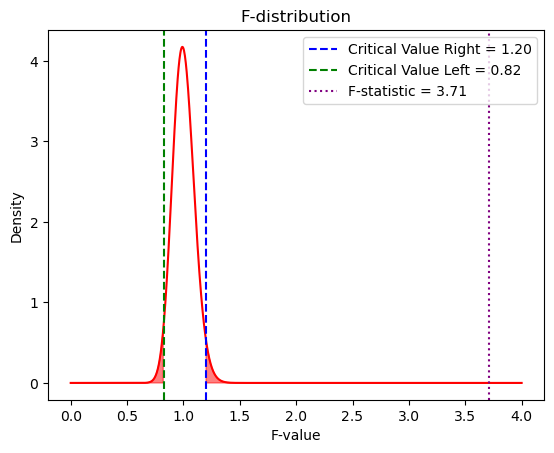

In [26]:
x = np.linspace(0, 4, 1000)
y = f.pdf(x, df1, df2)

plt.plot(x, y, 'r-')
plt.fill_between(x, 0, y, where=(x > f_critical_right) | (x < f_critical_left), color='red', alpha=0.5)
plt.title('F-distribution')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.axvline(f_critical_right, color='blue', linestyle='--', label=f'Critical Value Right = {f_critical_right:.2f}')
plt.axvline(f_critical_left, color='green', linestyle='--', label=f'Critical Value Left = {f_critical_left:.2f}')
plt.axvline(F, color='purple', linestyle=':', label=f'F-statistic = {F:.2f}')
plt.legend()
plt.show()

In [27]:
if (F > f_critical_right) or (F < f_critical_left):
    print("We reject the null hypothesis. The variance of insurance charges for smokers and non-smokers is not equal.")
else:
    print("There is not enough evidence to reject the null hypothesis. The variance of insurance charges for smokers and non-smokers may be the same.")


We reject the null hypothesis. The variance of insurance charges for smokers and non-smokers is not equal.




#### 2. Is the insurance charges for those with a BMI above 25 higher than insurance charges for those with a BMI below 25?

Assume:
$$ \mu_1 : BMI > 25 $$
$$ \mu_2 : BMI \leq 25 $$

The issue can be resolved by using a two-population proportion hypothesis test. We can employ the t-distribution to address this problem:

$$ T = \frac{\bar{x}-\mu_0}{\sqrt{s^2/n}} \sim t_{n-1}.$$

The t-distribution is commonly used when comparing the means of two groups and the population variance is unknown. Given that we are comparing charges for two groups based on their BMI (above 25 and below 25), and we likely don’t know the variance of insurance charges for all such people in the population, the t-distribution is appropriate.


Hypothesis:
$$H_0: \mu_1 \leq  \mu_2 $$
$$H_1: \mu_1 > \mu_2 $$

In [28]:
# Classify the groups by BMI
miu_1 = insurance[insurance['bmi'] > 25]['charges']
miu_2 = insurance[insurance['bmi'] <= 25]['charges']

In [29]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(miu_1, miu_2, equal_var=False)

In [30]:
print(f"(t-statistics, p-value): {t_stat}, {p_value: .10f}")


(t-statistics, p-value): 5.953486371741477,  0.0000000044


In [31]:
alpha = 0.05
insurance = len(miu_1) + len(miu_2) - 2  # degree of freedom
t_critical = stats.t.ppf(1 - alpha, insurance)
print(f"t-critical: {t_critical}")


t-critical: 1.6459949688112576


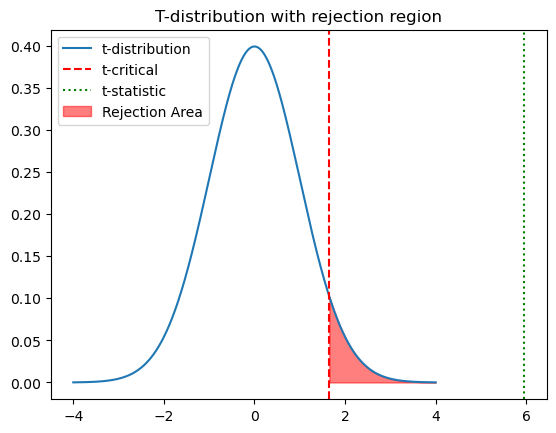

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, insurance)

plt.plot(x, y, label="t-distribution")
plt.axvline(x=t_critical, color='red', linestyle='--', label="t-critical")
plt.axvline(x=t_stat, color='green', linestyle=':', label="t-statistic")
plt.fill_between(x, y, where=(x > t_critical), color='red', alpha=0.5, label='Rejection Area')
plt.legend()
plt.title("T-distribution with rejection region")
plt.show()


In [33]:
if t_stat > t_critical:
    print("Reject the null hypothesis. There is enough evidence to state that health bills with BMI > 25 are higher than with BMI <= 25.")
else:
    print("The null hypothesis cannot be rejected.")


Reject the null hypothesis. There is enough evidence to state that health bills with BMI > 25 are higher than with BMI <= 25.


#### 3. Does the proportion of female smokers fall below that of male smokers?



Assume:

$$ p_1 : smokers|female $$
$$ p_2 : smokers|male $$
    

Hypothesis:
$$H_0: p_1 \geq  p_2 $$
$$H_1: p_1 < p_2 $$

The problem can be solved using a two-population proportion hypothesis test. When you're comparing proportions between two groups (in this case, the proportion of smokers among females vs. the proportion among males), the z-test for two proportions is appropriate. This test examines whether there's a statistically significant difference between the two proportions. We can use the z-distribution to address this issue :
$$ z = \frac{\hat{p}-{p}_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} $$

with, 
$$ \hat{p} = \frac{x}{n} $$

In [34]:
insurance = pd.read_csv("insurance.csv")

# Gather data
female = insurance[insurance['sex'] == 'female']
male = insurance[insurance['sex'] == 'male']

# # Calculate sample proportions
p1 = len(female[female['smoker'] == 'yes']) / len(female)
p2 = len(male[male['smoker'] == 'yes']) / len(male)

n1 = len(female)
n2 = len(male)

p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)


# Compute the Z-test statistic
z = (p1 - p2) / ((p_combined * (1 - p_combined) * ((1/n1) + (1/n2))) ** 0.5)


In [35]:
# Decision rule (with alpha = 0.05)

alpha = 0.05
z_critical = norm.ppf(alpha)  # Using ppf to search on the left side of the distribution since we are testing for "less than"


In [36]:
# Get the p-value
p_value = stats.norm.cdf(z)


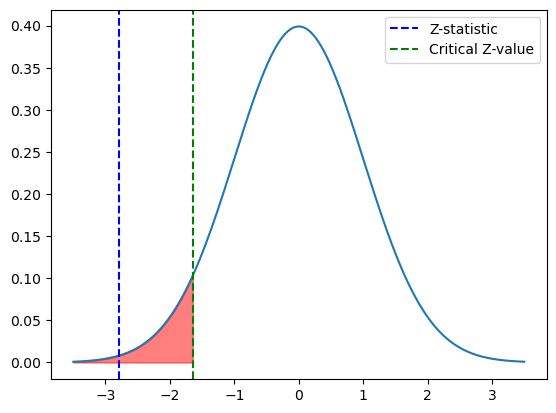

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3.5, 3.5, 0.001)
plt.plot(x, norm.pdf(x, 0, 1))
plt.fill_between(x, 0, norm.pdf(x, 0, 1), where=(x < z_critical), color='red', alpha=0.5)
plt.axvline(x=z, color='blue', linestyle='--', label="Z-statistic")
plt.axvline(x=z_critical, color='green', linestyle='--', label="Critical Z-value")
plt.legend()
plt.show()


In [38]:
print("Z-statistic:", z)
print("Critical Z-value:", z_critical)
print(f"p-value: {p_value}")

Z-statistic: -2.7867402154855503
Critical Z-value: -1.6448536269514729
p-value: 0.002662057082160266


In [39]:
# Conclusion
if z < z_critical:
    print("Reject the null hypothesis. The proportion of female smokers is SMALLER than the proportion of male smokers.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference between the proportion of female and male smokers.")


Reject the null hypothesis. The proportion of female smokers is SMALLER than the proportion of male smokers.
